In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from plotnine import *

In [2]:
d = pd.read_csv('rank_runs_summary.csv')

d

,example_name,estimate_name,SpearmanR_all,SpearmanR_test,pick_auc,mean pick KL divergence,training lists,test lists,data_size,test_size,run_i,rand_seed
0,uci wine example,Stan inspection model,0.467089,0.460233,0.551350,inf,100,100,6497,6015,0,682143856
1,uci wine example,Stan utility model,0.483126,0.475498,0.778663,0.375640,100,100,6497,6015,0,682143856
2,uci wine example,logistic,0.491947,0.484366,0.772338,0.429960,100,100,6497,6015,0,682143856
3,uci wine example,observed score,0.525406,0.516799,0.592825,0.458141,100,100,6497,6015,0,682143856
4,uci wine example,Stan inspection model,0.385303,0.384577,0.600300,inf,100,100,6497,6018,1,664543176
...,...,...,...,...,...,...,...,...,...,...,...,...
75,uci wine example,observed score,0.510695,0.507131,0.604975,0.458491,100,100,6497,6015,18,1718405262
76,uci wine example,Stan inspection model,0.265869,0.263915,0.507887,inf,100,100,6497,6018,19,1324584049
77,uci wine example,Stan utility model,0.377650,0.373641,0.724588,0.408184,100,100,6497,6018,19,1324584049
78,uci wine example,logistic,0.373630,0.369088,0.715313,0.444783,100,100,6497,6018,19,1324584049


In [3]:
n_draws = int(np.max(d['run_i']) + 1)

In [4]:
d_SpearmanR = d.melt(
    id_vars=['example_name', 'estimate_name'],
    value_vars=['SpearmanR_all', 'SpearmanR_test'],
    var_name='measurement',
    value_name='Spearman R',
)

d_SpearmanR

,example_name,estimate_name,measurement,Spearman R
0,uci wine example,Stan inspection model,SpearmanR_all,0.467089
1,uci wine example,Stan utility model,SpearmanR_all,0.483126
2,uci wine example,logistic,SpearmanR_all,0.491947
3,uci wine example,observed score,SpearmanR_all,0.525406
4,uci wine example,Stan inspection model,SpearmanR_all,0.385303
...,...,...,...,...
155,uci wine example,observed score,SpearmanR_test,0.507131
156,uci wine example,Stan inspection model,SpearmanR_test,0.263915
157,uci wine example,Stan utility model,SpearmanR_test,0.373641
158,uci wine example,logistic,SpearmanR_test,0.369088


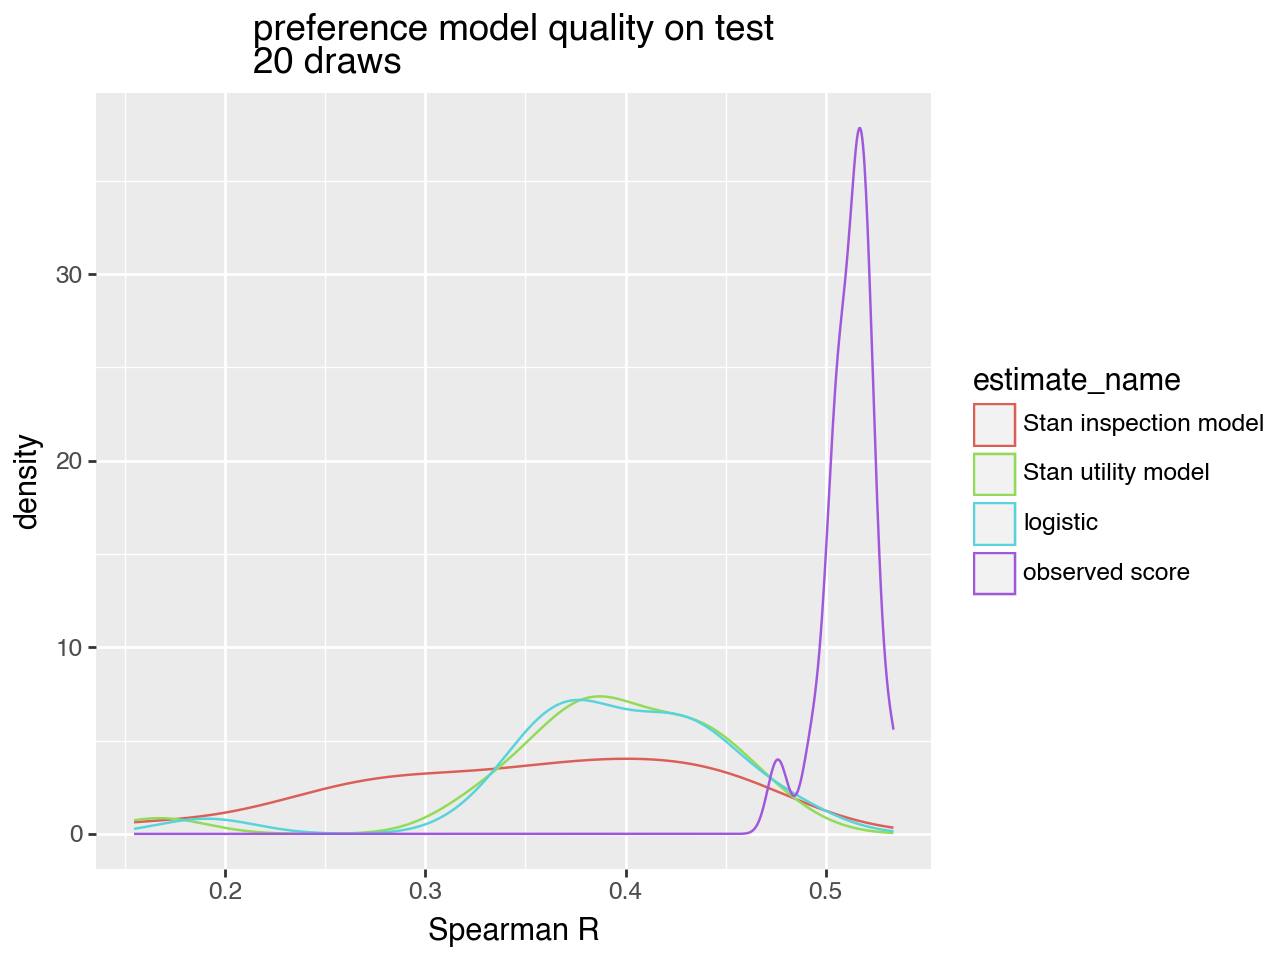

In [5]:
(
    ggplot(
        data=d_SpearmanR.loc[d_SpearmanR['measurement'] == 'SpearmanR_test', :],
        mapping=aes(
            x='Spearman R',
            color='estimate_name',
        )
    )
    + geom_density()
    + ggtitle(f"preference model quality on test\n{n_draws} draws")
)

In [6]:
estimate_names = sorted(set(d['estimate_name']))

estimate_names

['Stan inspection model', 'Stan utility model', 'logistic', 'observed score']

Stan inspection model


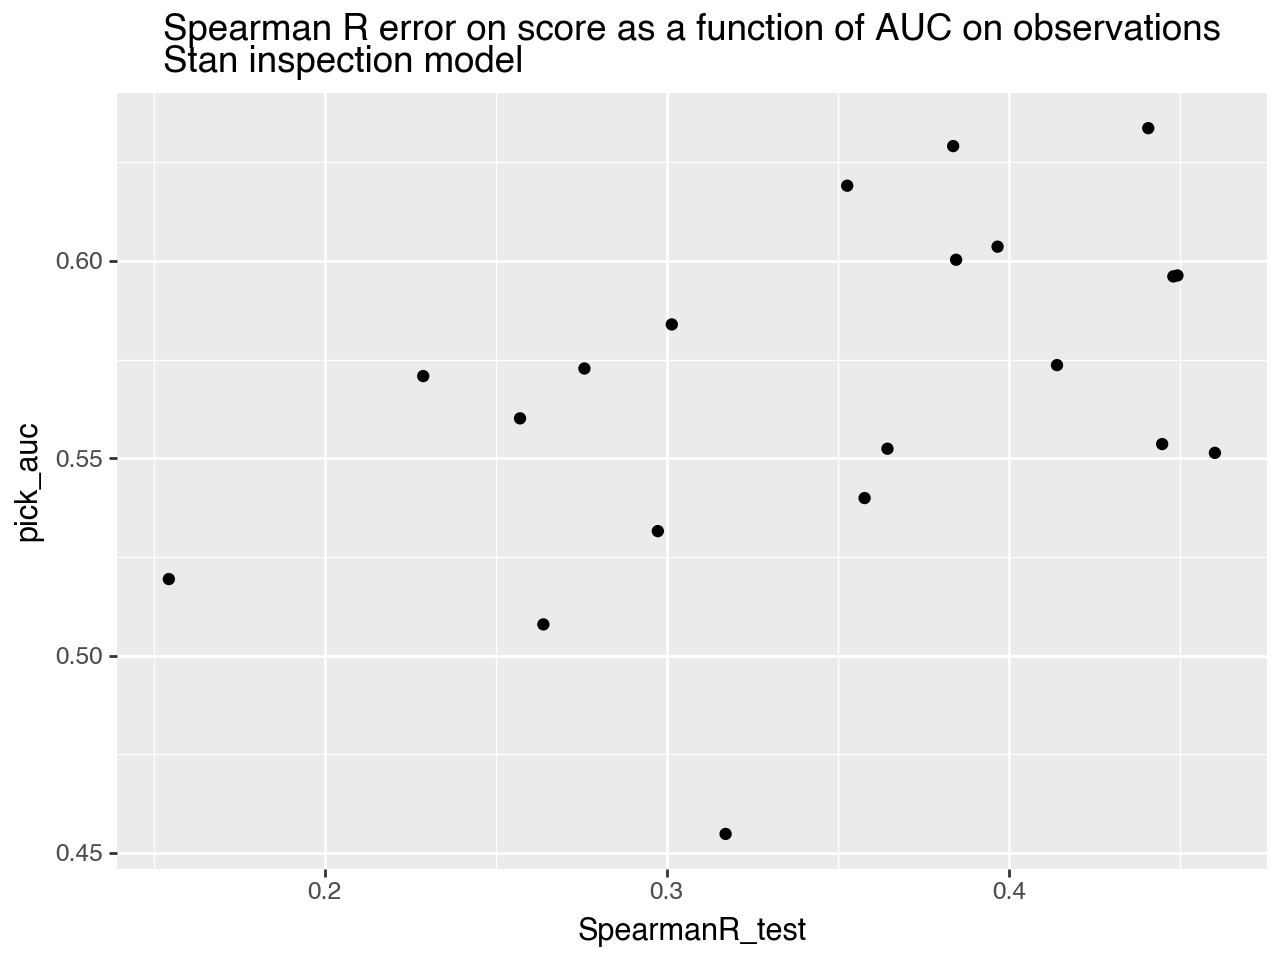

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4.858
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0408
Time:                        16:40:13   Log-Likelihood:                 23.742
No. Observations:                  20   AIC:                            -43.48
Df Residuals:                      18   BIC:                            -41.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1594      0.232     -0.688      0.500      -0.646       0.327
pick_auc       0.8970      0.407      2.204      0.041       0.042       1.752
==============================================================================
Omnibus:                        0.645   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.701
Skew:                          -0.286   Prob(JB):                        0.704
Kurtosis:                       2.284   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Stan utility model


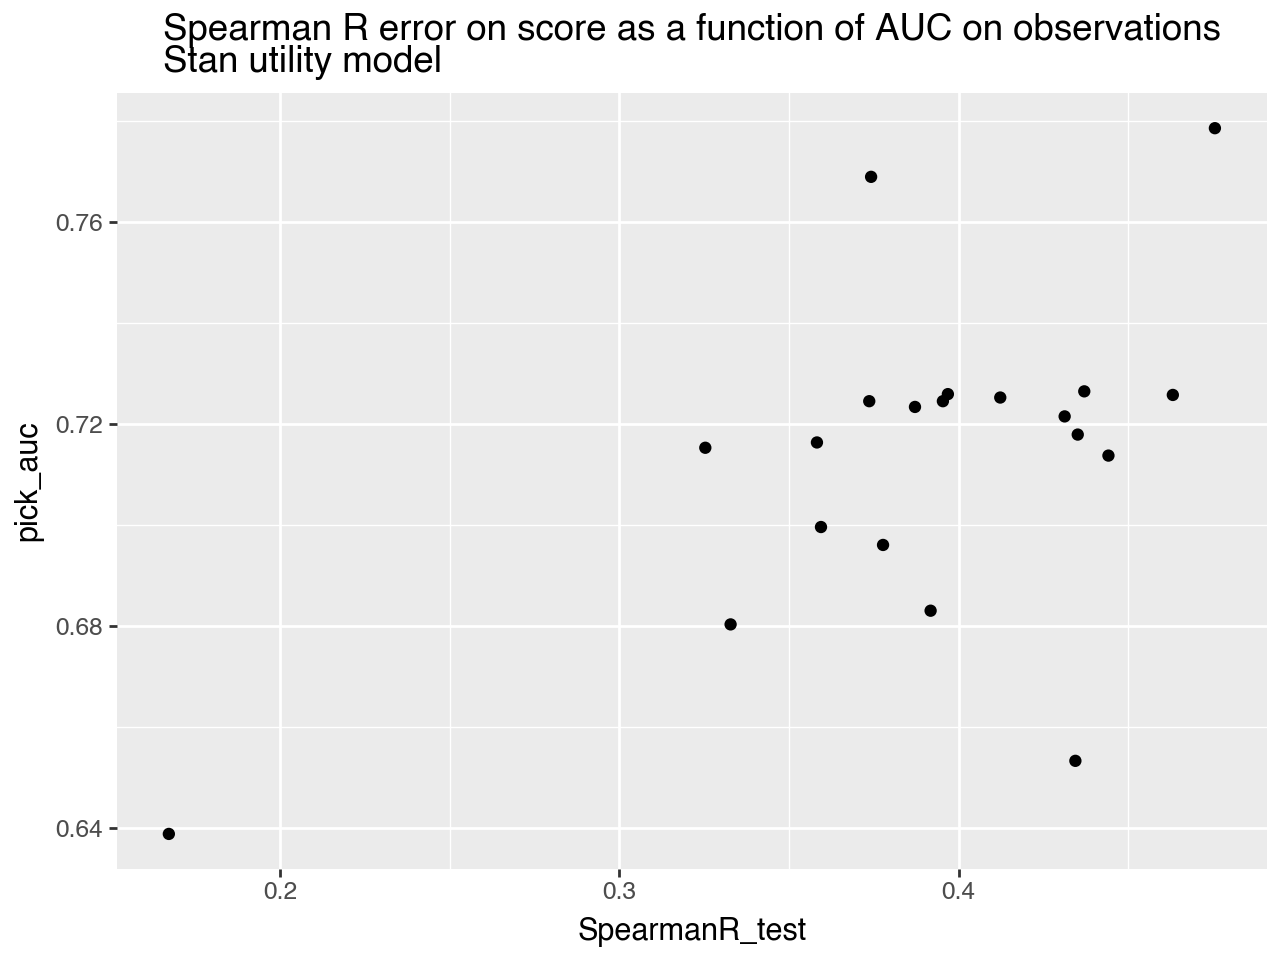

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     8.432
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00947
Time:                        16:40:13   Log-Likelihood:                 30.223
No. Observations:                  20   AIC:                            -56.45
Df Residuals:                      18   BIC:                            -54.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4336      0.283     -1.530      0.143      -1.029       0.162
pick_auc       1.1531      0.397      2.904      0.009       0.319       1.987
==============================================================================
Omnibus:                        2.596   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.008
Skew:                          -0.423   Prob(JB):                        0.604
Kurtosis:                       3.703   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

logistic


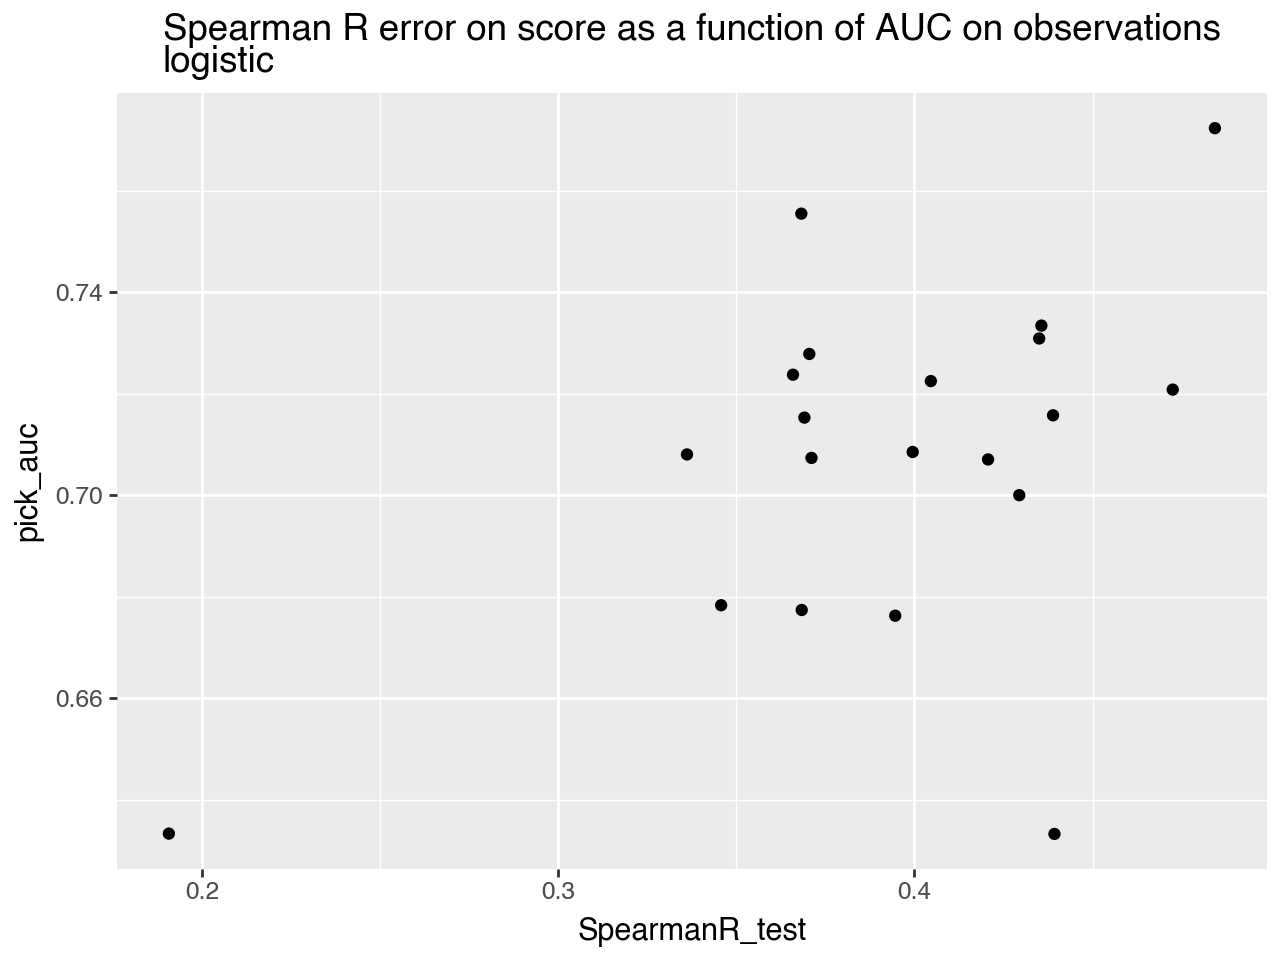

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     6.062
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0241
Time:                        16:40:13   Log-Likelihood:                 30.422
No. Observations:                  20   AIC:                            -56.84
Df Residuals:                      18   BIC:                            -54.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2516      0.262     -0.962      0.349      -0.801       0.298
pick_auc       0.9099      0.370      2.462      0.024       0.133       1.686
==============================================================================
Omnibus:                        2.084   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                0.688
Skew:                          -0.334   Prob(JB):                        0.709
Kurtosis:                       3.615   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

observed score


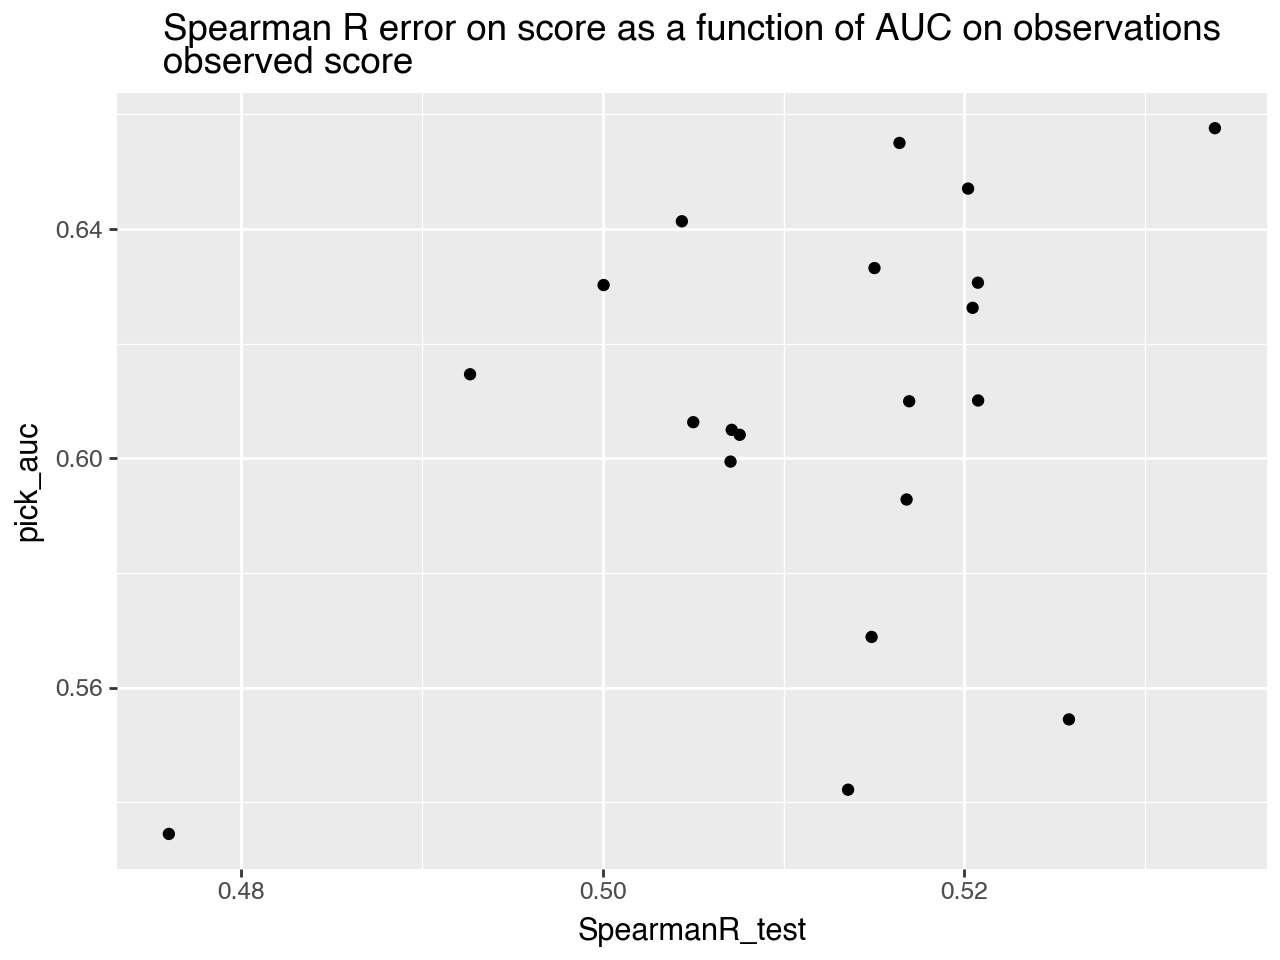

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.819
Date:                Thu, 29 Aug 2024   Prob (F-statistic):              0.110
Time:                        16:40:13   Log-Likelihood:                 61.023
No. Observations:                  20   AIC:                            -118.0
Df Residuals:                      18   BIC:                            -116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4319      0.048      9.066      0.000       0.332       0.532
pick_auc       0.1313      0.078      1.679      0.110      -0.033       0.296
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.786
Skew:                          -0.478   Prob(JB):                        0.675
Kurtosis:                       2.832   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
for estimate_name in estimate_names:
    di = d.loc[d['estimate_name'] == estimate_name, :]
    print(estimate_name)
    (
        ggplot(
            data=di,
            mapping=aes(x='SpearmanR_test', y='pick_auc')
        )
        + geom_point()
        + ggtitle(f"Spearman R error on score as a function of AUC on observations\n{estimate_name}")
    ).show()
    model = ols(
        'SpearmanR_test ~ 1 + pick_auc',
        data=di,
    ).fit()
    display(model.summary())